<a href="https://colab.research.google.com/github/HanRyunKyeong/projectmanager/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd #pandas 모듈 불러오기
df = pd.read_excel('/content/sample_data/car.xlsx') #파일을 열어서 그 내용을 df 변수에 넣기
df.head()

,mileage,model,price,year,my_car_damage,other_car_damage
0,63608,K3,970,2017,0,564596
1,69336,K3,1130,2015,1839700,1140150
2,36000,K3,1380,2016,446520,2244910
3,19029,K3,1390,2017,889000,4196110
4,97090,K3,760,2015,2339137,2029570


### 독립표본 t-검정

In [2]:
avante = df.price[df.model == 'Avante']
k3 = df.price[df.model == 'K3']

In [3]:
avante.mean()

833.4146341463414

In [4]:
k3.mean()

913.8115942028985

In [6]:
!pip install pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7028 sha256=d453a358b8a35d56ec09d9864a24b4f0d00611b86d3bf41dd77c9a08aea1f538
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


In [8]:
import pingouin as pg
pg.ttest(avante, k3, confidence=0.95)   #두집단의 평균을 비교

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.21101,196.691919,two-sided,0.028187,"[-152.11, -8.69]",0.242614,1.482,0.4119


Avante 평균 - K3 평균이 표본에서 -80만원인데 모집단에서는 95% 신뢰구간이 -152 ~ -8
어쨌든 모집단에서 Avante의 평균이 K3의 평균보다 낮다는 결론

---

귀무가설(기각할 가설): 둘이 똑같다(평균 차이 = 0)

0.028187 < 0.05

귀무가설 기각 -> 둘은 평균이 다르다

"통계적으로 유의한 차이"(Avante와 K3의 차이를 확인할 수 있을만큼 데이터가 충분하다)

귀무가설 기각이 안되면 -> 둘의 평균이 같다(X) -> 이럴 수도(Avante가 더 비쌀 수도) 있고, 저럴 수도(K3가 더 비쌀 수도) 있다

신뢰수준(또는 유의수준)은 여러분이 감당할 수 있는 수준에서 결정하면 됨

좀 틀려도 괜찮다 95%(즉 5% 정도는 틀려도 됨)- 아 이건 좀 틀리면 곤란한데.. 99%(즉 1%정도만 틀리겠다)

### 상관분석

In [9]:
import pingouin as pg
pg.corr(df.price, df.mileage)

,n,r,CI95%,p-val,BF10,power
pearson,274,-0.67616,"[-0.74, -0.61]",5.809388e-38,5.069e+34,1.0


r = 상관계수
CI = 신뢰구간
p-val = p-value

--------------------------------------------
- r(표본상관계수): -0.67616
    - 부호가 - => 서로 반대로 움직인다
    - 많이 돌아다닌 차는 가격이 떨어진다
- 모집단에서는 어떨까?
    - 95% 신뢰구간: -0.74 ~ -0.61  
- 귀무가설: 모집단 상관계수 = 0(관련이 없다)
    - 5.809388e-38 < 0.05
    - 귀무가설 기각 => 관련이 있다

### 상관행렬

In [11]:
df.corr(numeric_only=True)

,mileage,price,year,my_car_damage,other_car_damage
mileage,1.000000,-0.676160,-0.569850,0.192549,0.007950
price,-0.676160,1.000000,0.828908,-0.418789,-0.245997
year,-0.569850,0.828908,1.000000,-0.318469,-0.204411
my_car_damage,0.192549,-0.418789,-0.318469,1.000000,0.243626
other_car_damage,0.007950,-0.245997,-0.204411,0.243626,1.000000


### 산점도

<Axes: xlabel='mileage', ylabel='price'>

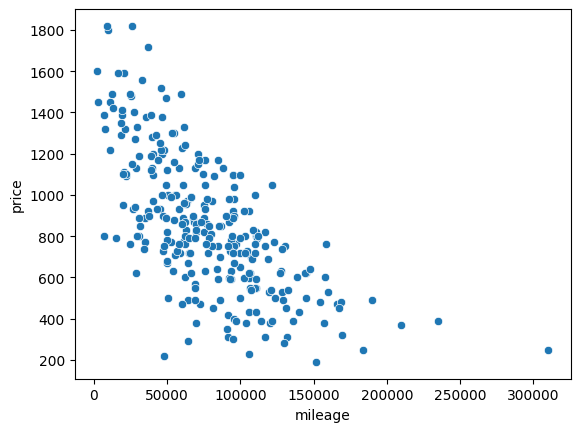

In [12]:
import seaborn as sns
sns.scatterplot(x='mileage', y='price', data=df)

### 회귀분석

In [13]:
from statsmodels.formula.api import ols
m = ols('price ~ mileage', data = df).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     229.1
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           5.81e-38
Time:                        04:10:53   Log-Likelihood:                -1895.7
No. Observations:                 274   AIC:                             3795.
Df Residuals:                     272   BIC:                             3803.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1258.7668     30.599     41.137      0.000    1198.526    1319.008
mileage       -0.0052      0.000    -15.136      0.000      -0.006      -0.005
==============================================================================
Omnibus:                        0.258   Durbin-Watson:                   1.101
Prob(Omnibus):                  0.879   Jarque-Bera (JB):                0.108
Skew:                           0.032   Prob(JB):                        0.947
Kurtosis:                       3.074   Cond. No.                     1.83e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.83e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

회귀분석에서 계수의 p-value
귀무가설: 모집단에서 기울기 = 0
         주행거리가 많든 적든 가격과는 무관
p < 0.05: 귀무가설 기각 => 주행거리는 가격과 유관

<Axes: xlabel='mileage', ylabel='price'>

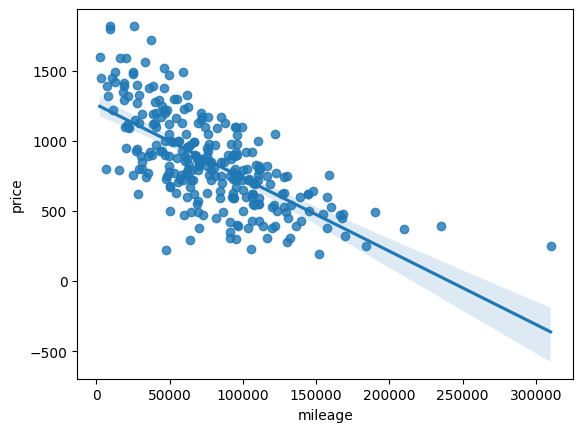

In [14]:
sns.regplot(x='mileage', y='price', data=df)